In [10]:
import json, sys, random
import numpy as np
import os

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.
C:\Users\Ben\AppData\Local\conda\conda\envs\kaggle-ship\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ben\AppData\Local\conda\conda\envs\kaggle-ship\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ben\AppData\Local\conda\conda\envs\kaggle-ship\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

(4000, 80, 80, 3)

In [3]:
from PIL import Image, ImageDraw 

In [4]:
from matplotlib import pyplot as plt

### Download and study the dataset

In [7]:
DATA_DIR = 'C:\kaggle\SISI'

In [11]:
# download dataset from json object
f = open(os.path.join(DATA_DIR,'shipsnet.json'))
dataset = json.load(f)
f.close()

In [12]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

INPUT

The dataset contains 2800 images. One image is represented as a vector of length 19200 elements.

In [13]:
input_data.shape

(4000, 19200)

In [14]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [ ]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

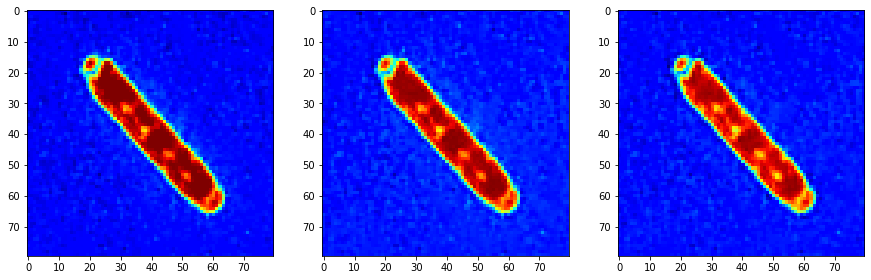

In [16]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

OUTPUT

The output is a vector of lenght 2800 elements.

In [2]:
output_data.shape

NameError: name 'output_data' is not defined

The vector contains int 0 and 1

In [18]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

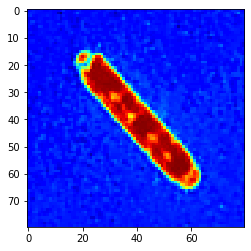

In [59]:
plt.imshow(green_spectrum)

Vector contains of 2100 zeros and 700 units. This means that in a dataset of 700 images tagged with "ship" and 2100 images marked as "not ship".

In [19]:
np.bincount(output_data)

array([3000, 1000], dtype=int64)

### Preparing data

In [20]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [21]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [22]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [23]:
# normalization
# https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
X_train = X_train / 255

### Traing network

In [24]:
np.random.seed(42)

In [25]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 2240 samples, validate on 560 samples
Epoch 1/10
 - 42s - loss: 0.3616 - acc: 0.8433 - val_loss: 0.1407 - val_acc: 0.9643
Epoch 2/10
 - 36s - loss: 0.1378 - acc: 0.9504 - val_loss: 0.1132 - val_acc: 0.9625
Epoch 3/10
 - 34s - loss: 0.1070 - acc: 0.9594 - val_loss: 0.0800 - val_acc: 0.9750
Epoch 4/10
 - 33s - loss: 0.0885 - acc: 0.9701 - val_loss: 0.0607 - val_acc: 0.9875
Epoch 5/10
 - 39s - loss: 0.0744 - acc: 0.9754 - val_loss: 0.0652 - val_acc: 0.9875
Epoch 6/10
 - 35s - loss: 0.0717 - acc: 0.9768 - val_loss: 0.0549 - val_acc: 0.9911
Epoch 7/10
 - 33s - loss: 0.0590 - acc: 0.9817 - val_loss: 0.0412 - val_acc: 0.9911
Epoch 8/10
 - 33s - loss: 0.0381 - acc: 0.9866 - val_loss: 0.0840 - val_acc: 0.9732
Epoch 9/10
 - 36s - loss: 0.0474 - acc: 0.9835 - val_loss: 0.0822 - val_acc: 0.9768
Epoch 10/10
 - 34s - loss: 0.0476 - acc: 0.9844 - val_loss: 0.0452 - val_acc: 0.9929


# Using network

### download image

In [54]:
image = Image.open(os.path.join(DATA_DIR,'scenes\scenes\sfbay_4.png'))
pix = image.load()

In [55]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [56]:
# create vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [57]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

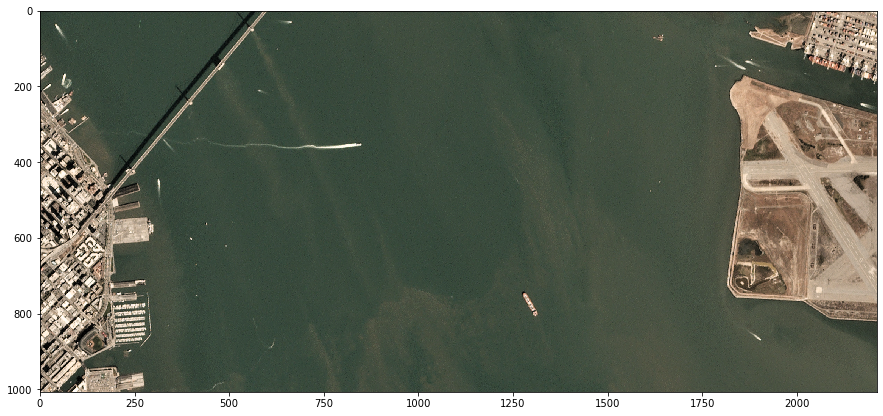

In [58]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [59]:
picture_tensor = picture_tensor.transpose(2,0,1)

### Search on the image

In [60]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [61]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [62]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:10 Y:10  [[0.00990969 0.99009025]]


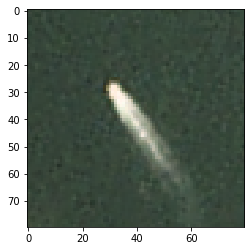

X:510 Y:10  [[0.07926413 0.92073584]]


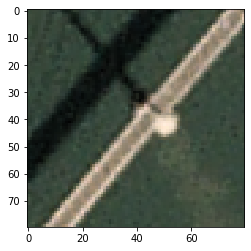

X:1860 Y:20  [[0.02247707 0.9775229 ]]


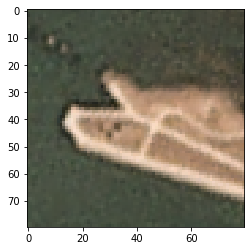

X:1950 Y:40  [[0.0190536  0.98094636]]


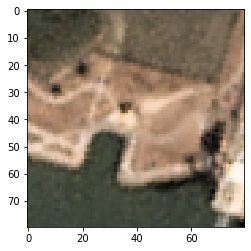

X:440 Y:100  [[0.02175093 0.9782491 ]]


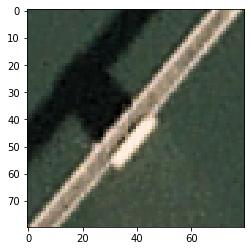

X:1820 Y:110  [[0.09943347 0.9005665 ]]


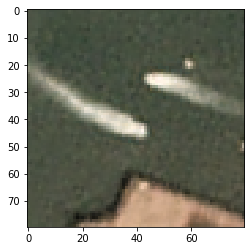

X:30 Y:150  [[0.00102142 0.9989786 ]]


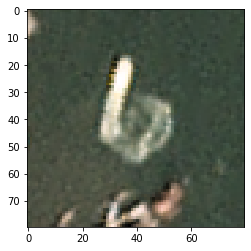

X:350 Y:200  [[0.08210699 0.91789305]]


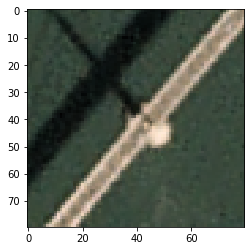

X:260 Y:310  [[0.08336717 0.9166328 ]]


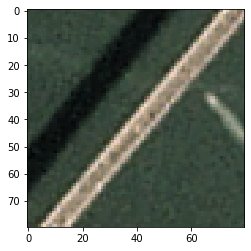

X:660 Y:320  [[0.07895286 0.92104715]]


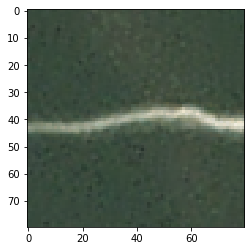

X:750 Y:320  [[7.9424022e-04 9.9920577e-01]]


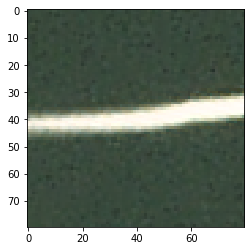

X:270 Y:420  [[0.02078357 0.9792164 ]]


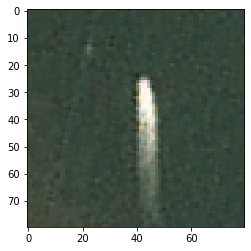

X:1810 Y:480  [[0.0898518  0.91014826]]


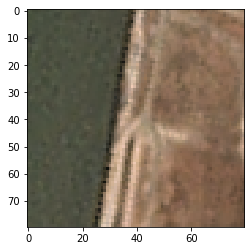

X:810 Y:550  

In [ ]:
step = 10
coordinates = []

# search every grid
for y in range(int((height-(80-step))/step)): # for each y colum
    for x in range(int((width-(80-step))/step)): # for each x row cell
        area = cutting(x*step, y*step) # take cell
        result = model.predict(area) # apply model
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates): # if score > 0.9, lets say its a ship dawg
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [ ]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [ ]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

In [ ]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()

### Save the model

In [ ]:
import datetime

In [50]:
model.save(os.path.join(DATA_DIR,'{}-keras-model.h5'.format(datetime.date.today().strftime("%d%m%Y"),)))